In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cargo la data a un df
df = pd.read_csv('train.csv', parse_dates=['Order Date', 'Ship Date'])
display(df)

In [ ]:
# Convierto a formato de fechas
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
# Lleno los pocos nulos que hay en Postal Code
df['Postal Code'] = df['Postal Code'].fillna(df['Postal Code'].mode()[0])

# Elimino Row ID porque no aporta valor
df = df.drop(columns='Row ID')

# Cambio el nombre de Columnas
df = df.rename(columns={'Product Name': 'Product'})

# Convierto los ingresos a miles
df['Sales'] = df['Sales'] / 1000

In [ ]:
# Ingeniería de Características

# ORDER DATE Columnas de Año y Mes
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month_name().str[:3]

# SHIP DATE Columnas de Año y Mes
df['Ship Year'] = df['Ship Date'].dt.year
df['Ship Month'] = df['Ship Date'].dt.month_name().str[:3]
display(df)

In [ ]:
# PRINCIPALES DISTRIBUCIONES 1
fig, axe = plt.subplots(nrows=2, ncols=2, figsize=(11,9))
fig.suptitle('Principales Distribuciones 1', fontweight='bold')

# Para poder iterar entre los axes 
axe = axe.flatten()

dist_categoricas = ['Ship Mode', 'Segment', 'Category', 'Sub-Category']

for i, cat in enumerate(dist_categoricas):
    
    axe[i] = sns.countplot(data=df, x=cat, ax=axe[i], hue=cat, palette='mako', 
                           order=df[cat].value_counts().index)
    axe[i].set_title(f"Distribución de C. Pedidos por {cat}")
    axe[i].set_xlabel('')
    axe[i].set_ylabel('C. Pedidos')
    axe[i].tick_params(labelrotation=60)

plt.tight_layout()
plt.show()

In [ ]:
# PRINCIPALES DISTRIBUCIONES 2
fig2, axe2 = plt.subplots(nrows=2, ncols=2, figsize=(13,9))
fig2.suptitle('Principales Distribuciones 2', fontweight='bold')

# Para poder iterar entre el i de dist_categoricas2
axe2 = axe2.flatten()

dist_categoricas2 = ['City', 'State']

# TOP 20 Gráficos 1 y 2
for i, cat2 in enumerate(dist_categoricas2):
    axe2[i] = sns.countplot(data=df, x=cat2, ax=axe2[i], palette='viridis', hue=cat2, 
                            order=df[cat2].value_counts().iloc[:20].index)
    axe2[i].set_title(f"Top 20 Distribución de C. Pedidos por {cat2}")
    axe2[i].tick_params(labelrotation=60)
    axe2[i].set_xlabel('')
    axe2[i].set_ylabel('C. Pedidos')



orden_meses = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 
               'Oct', 'Nov', 'Dec']

# Gráfico 3 (Años)
sns.countplot(data=df, x='Order Year', ax=axe2[2], palette='viridis', 
              hue='Order Year', legend=False)
axe2[2].set_title(f"Distribución C. Pedidos por Año")
axe2[2].set_xlabel('')
axe2[2].set_ylabel('C. Pedidos')

# Gráfico 4 (Meses)
sns.countplot(data=df, x='Order Month', ax=axe2[3], palette='viridis',
              order=orden_meses, hue='Order Month', legend=False)
axe2[3].set_title('Distribución de C. Pedidos por Meses')
axe2[3].set_xlabel('')
axe2[3].set_ylabel('C. Pedidos')

plt.tight_layout()
plt.show()

In [ ]:
# INGRESOS X VARIABLES CATEGÓRICAS SIMPLES POR MESES Y AÑO

iter_sales = ['Segment', 'Region', 'Category']

fig3, axe3 = plt.subplots(nrows=3, ncols=2, figsize=(9,11)) 
fig3.suptitle('Ingresos (en Miles) por Segmento, Región y Categorías', 
              fontweight='bold')

# Para poder iterar y ordenar los gráficos correctamente
axe3 = axe3.flatten()
i_m = 0
i_y = 1

# Creación de los gráficos

# Gráficos de Mes
for cat in iter_sales:
    ing_cat_month = df.groupby(['Order Month', cat])['Sales'].sum() \
                                                        .unstack(fill_value=0)
    ing_cat_month = ing_cat_month.reindex(orden_meses)
    ing_cat_month.plot(kind='bar', stacked=True, ax=axe3[i_m], colormap='Greens')
    axe3[i_m].set_title(f'Ingresos Mensuales por {cat} (en miles)')
    axe3[i_m].set_xlabel('')
    axe3[i_m].set_ylabel('')
    axe3[i_m].tick_params(rotation=0)
    axe3[i_m].set_facecolor('lightgray')
    
    # Leyenda
    axe3[i_m].legend().get_frame().set_facecolor('lightgray')
    axe3[i_m].legend().get_frame().set_edgecolor('black')
    
# Gráficos de Año    
    ing_cat_year = df.groupby(['Order Year', cat])['Sales'].sum() \
                                                        .unstack(fill_value=0)
    ing_cat_year.plot(kind='bar', stacked=True, ax=axe3[i_y], colormap='Blues')
    axe3[i_y].set_title(f'Ingresos Anuales por {cat} (en miles)')
    axe3[i_y].set_xlabel('')
    axe3[i_y].set_ylabel('')
    axe3[i_y].tick_params(rotation=0)
    axe3[i_y].set_facecolor('lightgray')
    
    # Leyenda
    axe3[i_y].legend().get_frame().set_facecolor('lightgray')
    axe3[i_y].legend().get_frame().set_edgecolor('black')
    
    i_m+=2
    i_y+=2
    
plt.tight_layout()
plt.show()

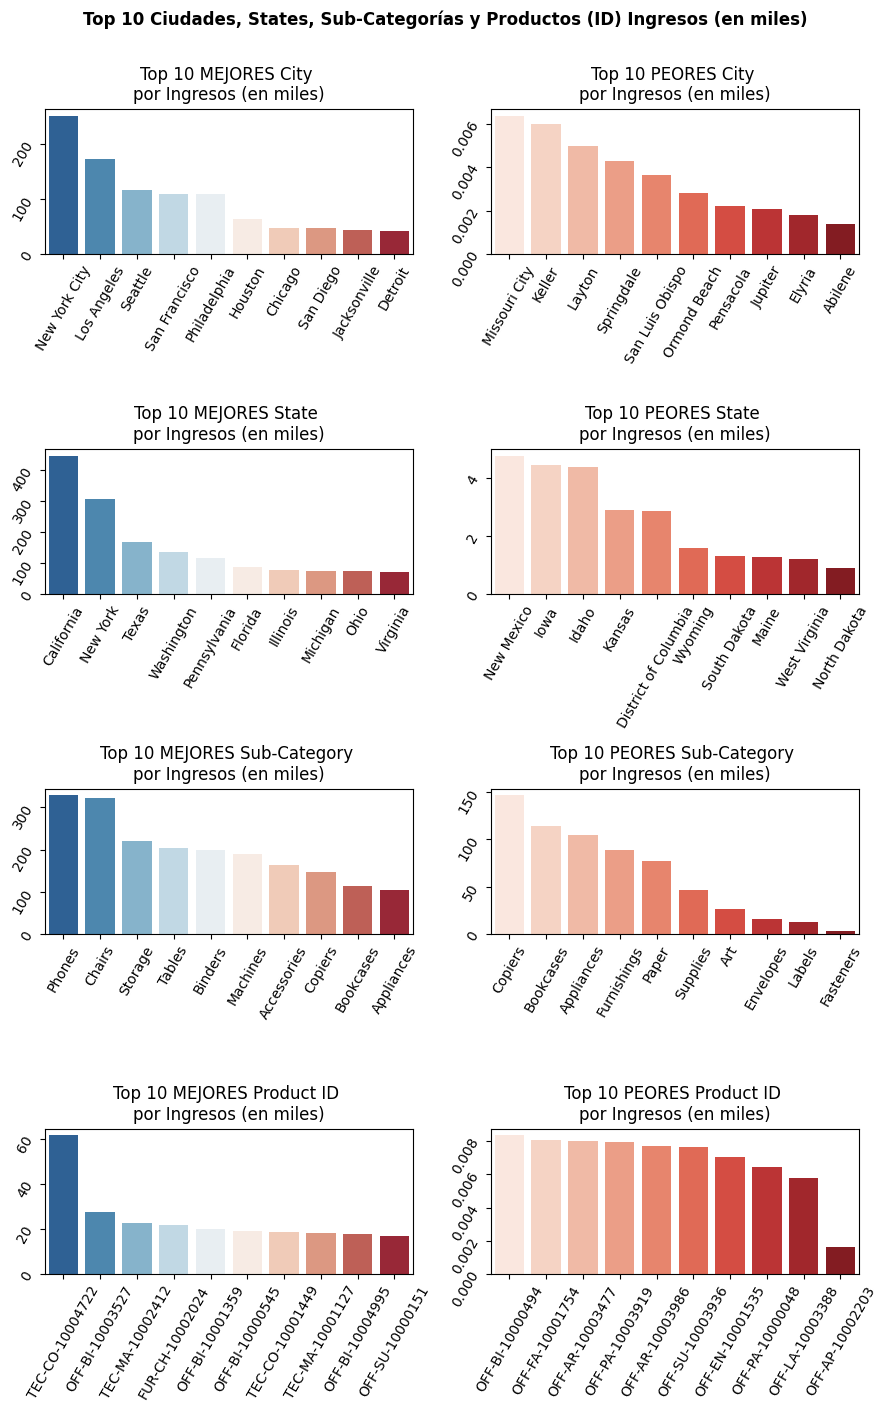

In [ ]:
# TOP 10 MEJORES Y PEORES X VARIABLES CATEGÓRICAS AMPLIAS
cat2 = ['City', 'State', 'Sub-Category', 'Product ID']

fig4, axe4 = plt.subplots(nrows=4, ncols=2, figsize=(9,14))
fig4.suptitle('Top 10 Ciudades, States, Sub-Categorías y Productos (ID) '  
              'Ingresos (en miles)', fontweight='bold', y=1.005)

# Para poder iterar entre los axes
axe4 = axe4.flatten()
i_m = 0
i_p = 1

for cat in cat2:
    # Gráficos Top 10 Mejores
    # Se crea el df agrupado a iterar
    ing_cat_month2_top_m = df.groupby(cat)['Sales'].sum() \
                .sort_values(ascending=False)[:10].reset_index(name='Sales')
    # Se crea el gráfico
    sns.barplot(data=ing_cat_month2_top_m, ax=axe4[i_m], x=cat, y='Sales', 
                palette='RdBu_r', hue=cat)
    axe4[i_m].tick_params(rotation=60)
    axe4[i_m].set_xlabel('')
    axe4[i_m].set_ylabel('')
    axe4[i_m].set_title(f'Top 10 MEJORES {cat} \npor Ingresos (en miles)')
    
    # Gráficos Top 10 PEORES
    # Se crea el df agrupado a iterar
    ing_cat_month2_top_p = df.groupby(cat)['Sales'].sum() \
                .sort_values(ascending=True)[:10].reset_index(name='Sales')
    # Para mayor orden visual
    ing_cat_month2_top_p = ing_cat_month2_top_p.sort_values(by='Sales', 
                                                            ascending=False)                                             
    # Se crea el gráfico
    sns.barplot(data=ing_cat_month2_top_p, ax=axe4[i_p], palette='Reds', 
                x=cat, y='Sales', hue=cat)      
    axe4[i_p].tick_params(rotation=60)
    axe4[i_p].set_xlabel('')
    axe4[i_p].set_ylabel('')
    axe4[i_p].set_title(f'Top 10 PEORES {cat} \npor Ingresos (en miles)')

    i_m+=2
    i_p+=2

plt.tight_layout()
plt.show()